Programmer: Colleen Lemak  
Class: CPSC222, Fall 2021  
Data Assignment #7  
Date: 12/06/2021  
I attempted the bonus activity labeled "TitanicPredictions.ipynb".    
Description: This program uses Jupyter Notebook to execute various tasks.

# Titanic Classification
In this file, we will use Jupyter Notebook to tell an EDA story about the Titanic!

First, let's read in the data set and clean it up.

In [265]:
import pandas as pd

df = pd.read_csv("titanic.csv")
df = df.set_index("PassengerId")

df = df.drop("Name", axis=1)
df = df.drop("Ticket", axis=1)
df = df.drop("Fare", axis=1)
df = df.drop("Cabin", axis=1)

print(df)

             Survived  Pclass     Sex   Age  SibSp  Parch Embarked
PassengerId                                                       
1                   0       3    male  22.0      1      0        S
2                   1       1  female  38.0      1      0        C
3                   1       3  female  26.0      0      0        S
4                   1       1  female  35.0      1      0        S
5                   0       3    male  35.0      0      0        S
...               ...     ...     ...   ...    ...    ...      ...
887                 0       2    male  27.0      0      0        S
888                 1       1  female  19.0      0      0        S
889                 0       3  female   NaN      1      2        S
890                 1       1    male  26.0      0      0        C
891                 0       3    male  32.0      0      0        Q

[891 rows x 7 columns]


Now, we are able to properly clean and transform the data so we can use proper values!

In [266]:
from sklearn.preprocessing import LabelEncoder

# female = 0, male = 1
# C = 0, Q = 1, S = 2

columnsToEncode = list(df.select_dtypes(include=['category','object']))
le = LabelEncoder()

for i in columnsToEncode:
    df[i] = le.fit_transform(df[i])

df = df.dropna()

print(df)

             Survived  Pclass  Sex   Age  SibSp  Parch  Embarked
PassengerId                                                     
1                   0       3    1  22.0      1      0         2
2                   1       1    0  38.0      1      0         0
3                   1       3    0  26.0      0      0         2
4                   1       1    0  35.0      1      0         2
5                   0       3    1  35.0      0      0         2
...               ...     ...  ...   ...    ...    ...       ...
886                 0       3    0  39.0      0      5         1
887                 0       2    1  27.0      0      0         2
888                 1       1    0  19.0      0      0         2
890                 1       1    1  26.0      0      0         0
891                 0       3    1  32.0      0      0         1

[714 rows x 7 columns]


Let's make some summary statistics about people who survived versus those who didn't...

In [267]:
# female = 0, male = 1
# C = 0, Q = 1, S = 2

grouped_df = df.groupby("Survived")
survived = grouped_df.get_group(1)
not_survived = grouped_df.get_group(0)

print("By analyzing the chart, you can see the survivors were primarily women.")
print(survived)
print()
print("These statistics show the majority of non-survivors were men.")
print(not_survived)

By analyzing the chart, you can see the survivors were primarily women.
             Survived  Pclass  Sex   Age  SibSp  Parch  Embarked
PassengerId                                                     
2                   1       1    0  38.0      1      0         0
3                   1       3    0  26.0      0      0         2
4                   1       1    0  35.0      1      0         2
9                   1       3    0  27.0      0      2         2
10                  1       2    0  14.0      1      0         0
...               ...     ...  ...   ...    ...    ...       ...
876                 1       3    0  15.0      0      0         0
880                 1       1    0  56.0      0      1         0
881                 1       2    0  25.0      0      1         2
888                 1       1    0  19.0      0      0         2
890                 1       1    1  26.0      0      0         0

[290 rows x 7 columns]

These statistics show the majority of non-survivors were m

In [268]:
desc = df.describe()
print("Here are a few more statistics supporting our previous claims.")
print(desc)

Here are a few more statistics supporting our previous claims.
         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  714.000000  714.000000  714.000000  714.000000  714.000000  714.000000   
mean     0.406162    2.236695    0.634454   29.699118    0.512605    0.431373   
std      0.491460    0.838250    0.481921   14.526497    0.929783    0.853289   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    1.000000    0.000000   20.125000    0.000000    0.000000   
50%      0.000000    2.000000    1.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   38.000000    1.000000    1.000000   
max      1.000000    3.000000    1.000000   80.000000    5.000000    6.000000   

         Embarked  
count  714.000000  
mean     1.599440  
std      0.781483  
min      0.000000  
25%      2.000000  
50%      2.000000  
75%      2.000000  
max      3.000000  


To dive deeper into the survival statistics, let's visualize the data with other columns that could be related!

Let's start with the survived group, and visualize the data...

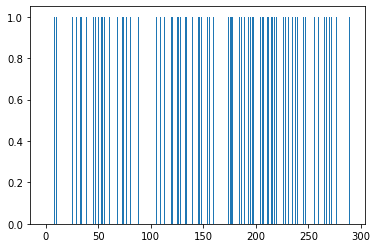

In [269]:
import matplotlib.pyplot as plt

y1 = survived["Sex"]
list_nums = list(range(len(y1)))

plt.figure()
plt.bar(list_nums, y1)
plt.show()

Now for the people who did not survive...

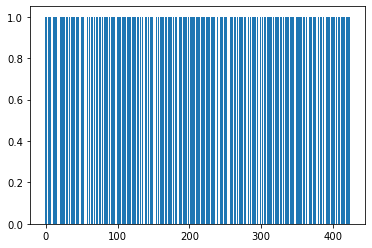

In [270]:
y2 = not_survived["Sex"]
list_nums = list(range(len(y2)))

plt.figure()
plt.bar(list_nums, y2)
plt.show()

Because we established that 0 means female and 1 means male, it is clear to see there are more males in the non-survivors group.  

From these graphs, we can see that men had a lower survival rate in comparison with their female counterparts.

To further test our hypotheses about this data, we can use **t-tests**.

Hypothesis: I will predict if the individual is older or equal to 30 years old, they are more likely to survive.  
Null hyp: if younger than 30, they will be more likely survive  
Alt hyp: if equal to or older than 30, they will be more likely survive

In [271]:
import scipy.stats as stats

# 0.05 level of significance, independent 1 tailed test
t_critical = 1.645
t_computed, p_value = stats.ttest_ind(not_survived["Age"], survived["Age"])
print("t-computed:", round(t_computed, 4), "p-value:", round(p_value/2, 4))

t-computed: 2.0667 p-value: 0.0196


Because 1.645 < 2.067, we reject $H_0$, and say that if they are older than 30, they are more likley to be a survivor.

Another t-test we could use could involve Pclass, also known as ticket class.

Hypothesis: I will predict that if the individual is in 1st class, they are most likely to survive.  
Null hyp: if in 1st class, they are most likely to survive.  
Alt hyp: if not in 1st class, they are most likely to survive.  

In [273]:
# 0.05 level of significance, independent 2 tailed test
t_critical = 1.960
survived_len = len(survived)

first = []
third = []
for item in survived["Pclass"]:
    if item == 1:
        first.append(item)
    if(item == 3):
        third.append([item])

# t_computed, p_value = stats.ttest_ind(third, first)

t_computed, p_value = stats.ttest_ind(not_survived["Pclass"], survived["Pclass"])

print("t-computed:", round(t_computed, 4), "p-value:", round(p_value/2, 4))

t-computed: 10.2849 p-value: 0.0


Now we will create a tree visualization...

Accuracy: 0.8


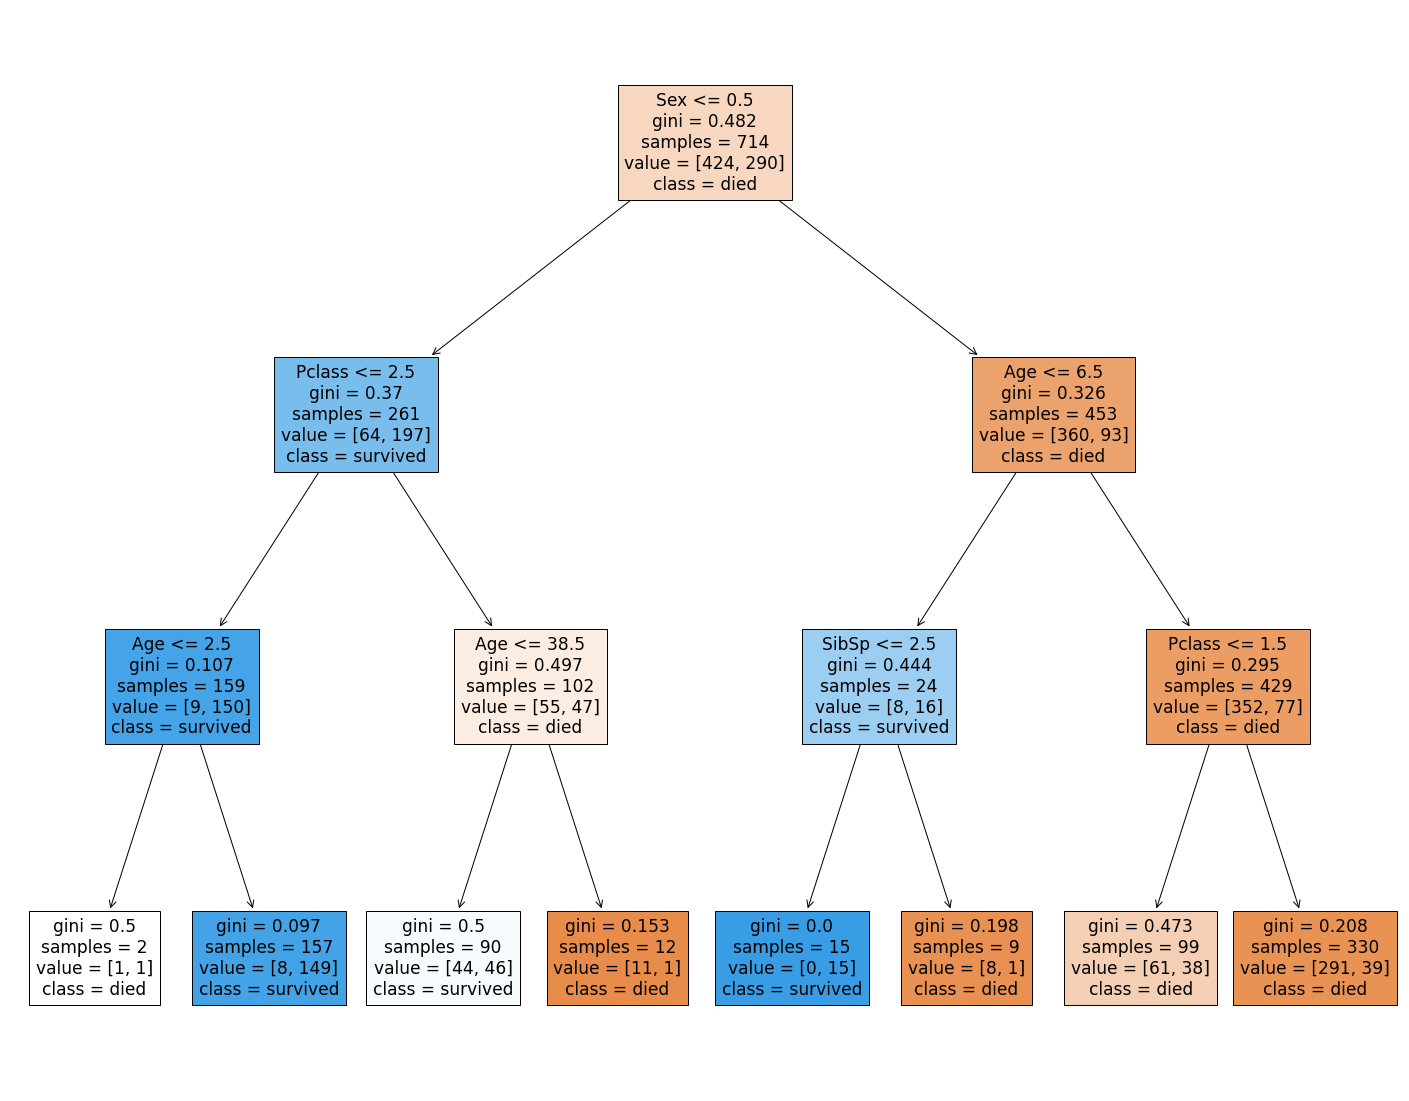

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import tree

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)
tree_clf = DecisionTreeClassifier(random_state=0, max_depth=3)
tree_clf.fit(X_train, y_train)
y_predicted = tree_clf.predict(X_test)
accuracy = tree_clf.score(X_test, y_test)
print("Accuracy:", round(accuracy, 2))

model = tree_clf.fit(X, y)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf, feature_names=X.columns, class_names={0: "died",1: "survived"}, filled=True)

plt.savefig("decision_tree.png")

What about using kNN to help us predict?

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
knn_clf.fit(X_train_normalized, y_train)

y_predicted = knn_clf.predict(X_test_normalized)
print("y predicted:", y_predicted)
print("nearest neighbors:", knn_clf.kneighbors(X_test_normalized))

y predicted: [0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0
 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 1 1 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0
 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
nearest neighbors: (array([[0.01359065, 0.16721987, 0.20725659],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.01359065],
       [0.16721987, 0.38878952, 0.50294661],
       [0.01359065, 0.04077195, 0.0543626 ],
       [0.        , 0.        , 0.        ],
       [0.0815439 , 0.0815439 , 0.1087252 ],
       [0.01359065, 0.01359065, 0.01359065],
       [0.        , 0.01359065, 0.0271813 ],
       [0.19190716, 0.19899484, 0.19899484],
       [0.        , 0.        , 0.0815439 ],
       [0.17158126, 0.18554564, 0.19026909],
       [0.06795325